# plot average IPC
The IPC of all benchmarks are listed in "ipc.csv" file. Below, you can reproduce the average IPC and re-plot the trend.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("ipc.csv")
df.head()

,suite,benchmark,chip count,160GB/s,300GB/s,600GB/s,900GB/s,1200GB/s,1400GB/s,1800GB/s,2048GB/s
0,SDK,conjugate-gradient,4,523.83,904.77,1411.53,1775.17,1974.49,2043.46,2068.95,2207.36
1,SDK,conjugate-gradient,8,539.09,958.92,1690.75,2208.06,2528.09,2744.18,2866.38,2991.21
2,SDK,conjugate-gradient,16,534.74,954.95,1694.85,2250.25,2684.58,3045.71,3292.87,3430.96
3,SDK,fdtd3d,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SDK,fdtd3d,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
chip_counts = [4, 8, 16]
bandwidth_cols = df.columns[3:]

results = {'chip count': chip_counts}

for col in bandwidth_cols:
    results[col] = [
        len(df[df['chip count'] == count][col].dropna()) / sum(1/x for x in df[df['chip count'] == count][col].dropna()) #harmonic mean
        for count in chip_counts
    ]
absolute_avg_ipc = pd.DataFrame(results)
absolute_avg_ipc.head()

,chip count,160GB/s,300GB/s,600GB/s,900GB/s,1200GB/s,1400GB/s,1800GB/s,2048GB/s
0,4,135.425789,242.801514,419.202641,523.924351,573.505547,613.424550,635.638778,657.110619
1,8,150.128722,267.337531,473.703982,635.831590,744.759014,825.424607,881.111055,914.438463
2,16,150.754847,267.905412,473.407804,634.646942,766.924564,878.471900,963.580772,1023.179199


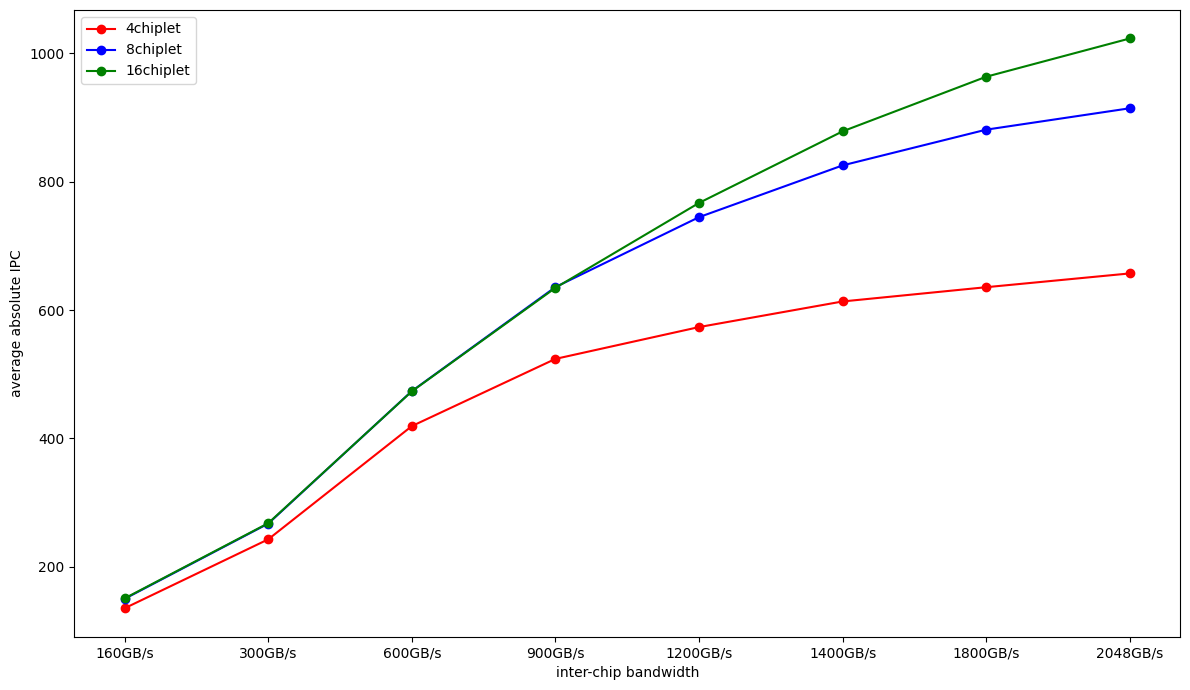

In [62]:
plt.figure(figsize=(12,7))
plt.xlabel("inter-chip bandwidth")
plt.ylabel("average absolute IPC")
plt.plot(bandwidth_cols, absolute_avg_ipc[absolute_avg_ipc['chip count'] == 4].values[0][1:], "r-o", label="4chiplet")
plt.plot(bandwidth_cols, absolute_avg_ipc[absolute_avg_ipc['chip count'] == 8].values[0][1:], "b-o", label="8chiplet")
plt.plot(bandwidth_cols, absolute_avg_ipc[absolute_avg_ipc['chip count'] == 16].values[0][1:], "g-o", label="16chiplet")
plt.legend()
plt.tight_layout()
plt.savefig("results/average_absolute_IPC.png")